<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/07_CH4_01~02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH04 분류

01 분류의 개요

지도학습의 대표적인 유형. 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측.

기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것



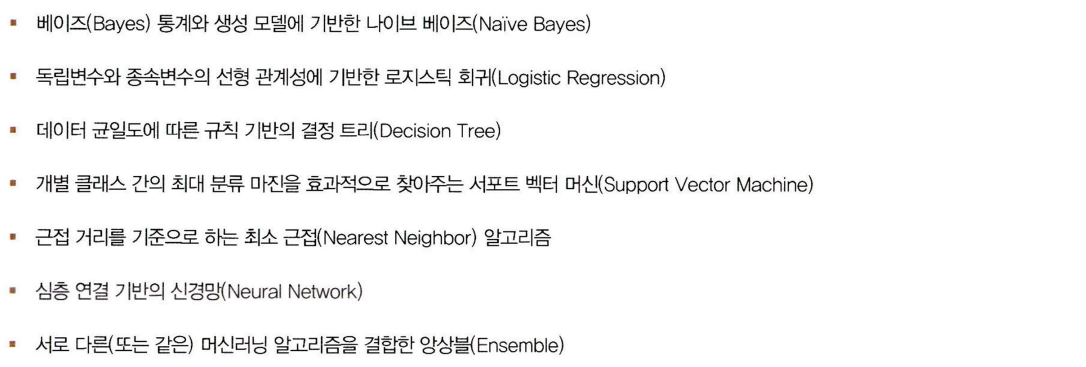

- 앙상블 : 분류에서 가장 각광 받는 방법. 일반적으로 배깅과 부스팅 방법으로 나뉨.

  - 배깅의 대표적: 랜덤 포레스트 -> 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용
  - 부스팅의 효시: 그래디언트 부스팅 -> 뛰어난 예측 성능, 수행 시간이 너무 오래 걸린다는 단점. XgBoost와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전 시키면서도 수행 시간을 단축시킨 알고리즘 계속 등장.


앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리. 결정트리는 매우 쉽고 유연하게 적용될 수있는 알고리즘. 또한 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야하며 이로 인한 과적합이 발생해 예측 성능을 저하시킬 수 도 있음

**02 결정 트리**

결정 트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘.
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.


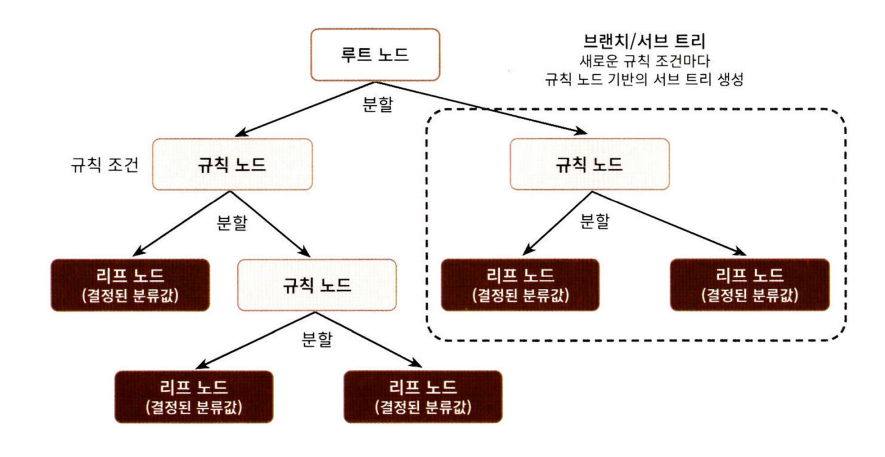

트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.

가능한 적은 결정 노드로 높은 예측  정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 함. 따라서 균일하게 데이터 세트 분할이 중요.



- 정보의 균일도를 측정하는 대표적인 방법 : 엔트로피를 이용한 정보 이득 지수와 지니 계수



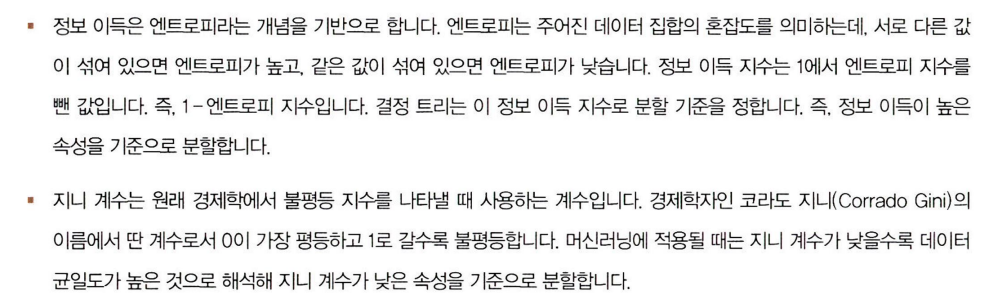

-결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는데 가장 좋은 조건.


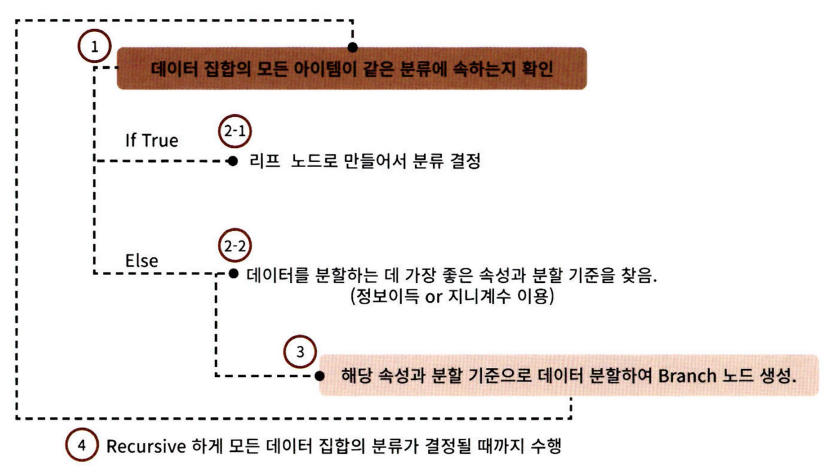

**결정 트리 모델의 특징**

정보의 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적.

결정 트리가 룰이 매우 명확하고 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화 표현도 가능.

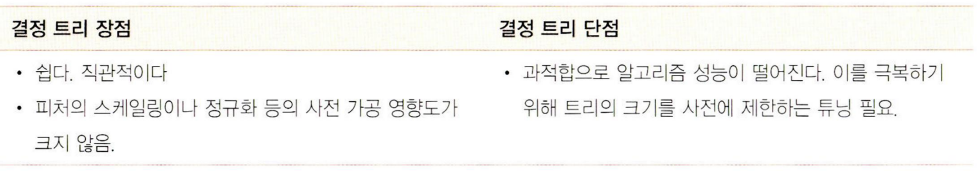

**결정 트리 파라미터**

사이킷런은 결정트리알고리즘을 구현한 DecisionTreeClassifier(분류)와 DecisionTreeRegressor(회귀) 클래스 제공.

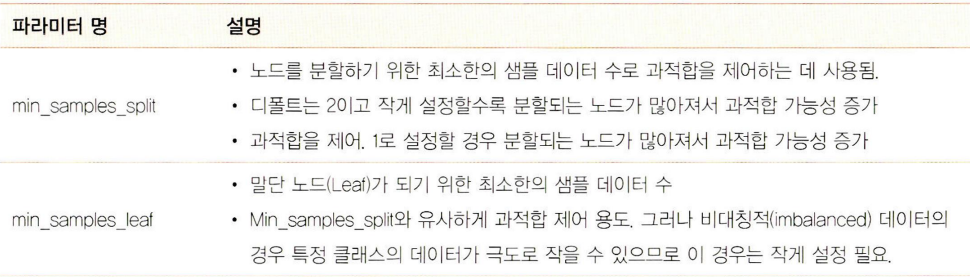


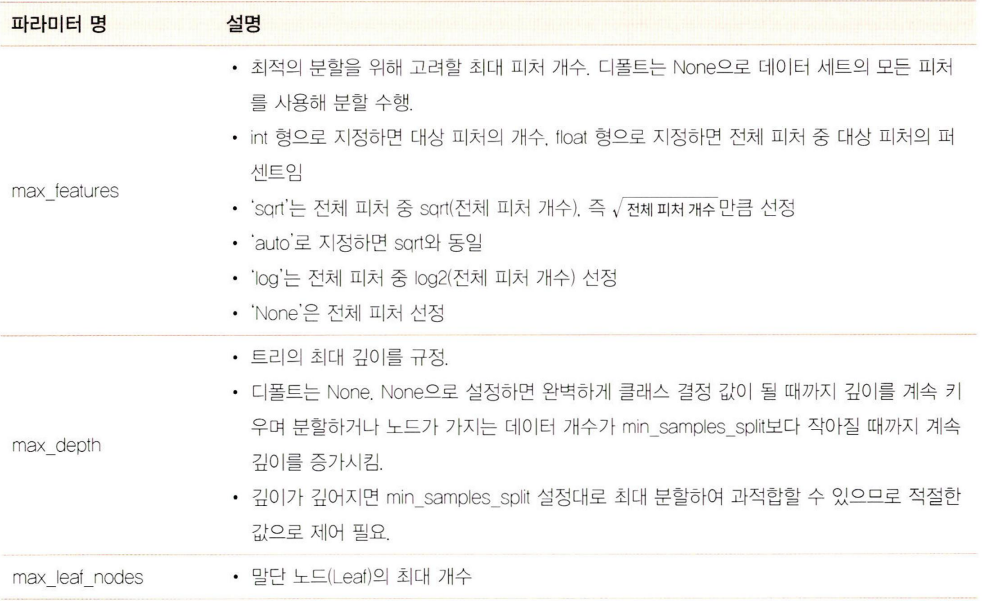


**결정 트리 모델의 시각화**

Graphviz 패키지 사용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#DecisionTree classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz() 함수 제공. export_graphviz()는 graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일 생성.


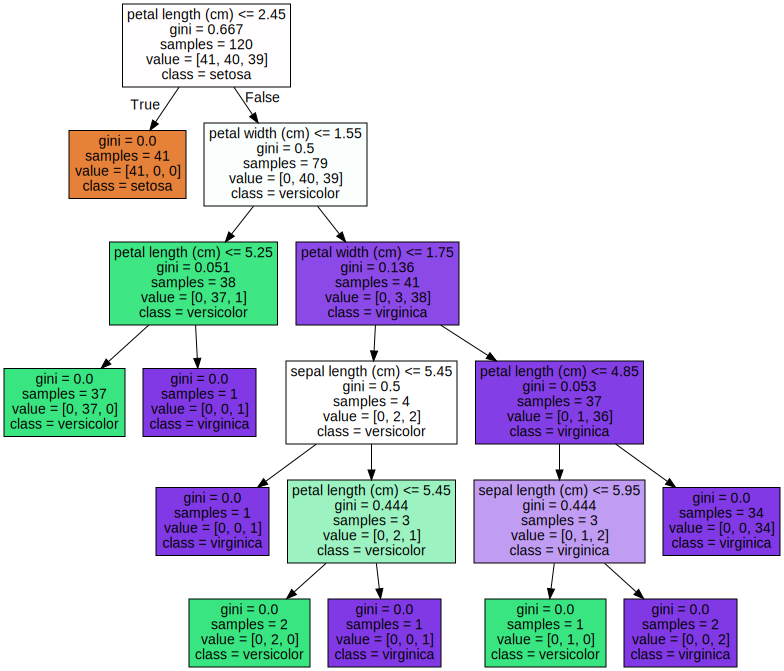

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

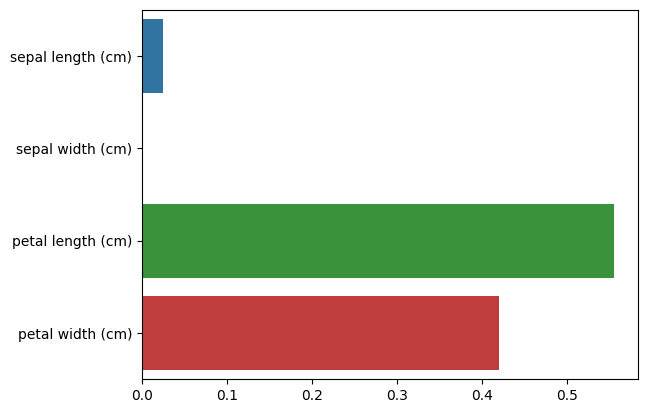

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**결정 트리 과적합**

make_classification() : 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 함수.

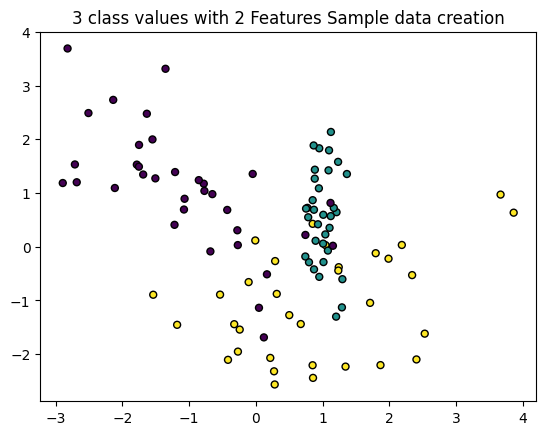

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

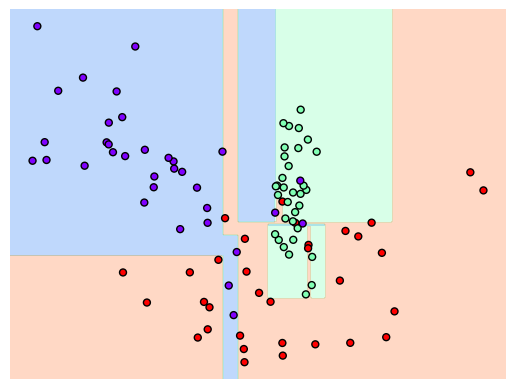

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()

  # 학습 데이터를 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
             clim = (y.min(), y.max()), zorder = 3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 train 데이터로 model 학습
  model.fit(X, y)

  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200),
                       np.linspace(ylim_start, ylim_end, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contourf()를 이용하여 class boundary를 visualization
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                         levels = np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim = (y.min(), y.max()),
                         zorder = 1)

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

**03 결정 트리 실습 - 사용자 행동 인식 데이터 세트**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름과 index명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/features.txt',sep='\s+', header=None, names=['Column_index', 'column_name'])

In [ ]:
# 피처명 index 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [ ]:
# 중복된 피처명 알아보기
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['Column_index']>1].count())
feature_dup_df[feature_dup_df['Column_index']>1].head()

Column_index    42
dtype: int64


,Column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
#총 42개의 피처명 중복-> 새로운 피처명을 갖는 df 반환 함수 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

  #각 데이터 파일은 공백으로 분리되어 있으므로 read-csv에서 공백 문자를 sep으로 할당
  feature_name_df=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/train/X_train.txt', sep='\s+', header=None, names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/test/X_test.txt', sep='\s+', header=None, names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/human+activity+recognition+using+smartphones/UCI HAR Dataset/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  #로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = get_human_dataset()

In [ ]:
#로드한 학습용 피처 데이터 세트

print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [ ]:
print(y_train['action'].value_counts())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))


# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파리미터:\n', dt_clf.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

In [ ]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

In [ ]:
params = {'max_depth' : [8,12,16,20], 'min_samples_split' : [16,24],}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 반환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()